In [1]:
using Plots
using LaTeXStrings
using SymPy
using QuadGK

# Report 06

# Lucas Schmidt Ferreira de Araujo

# Ecercice I

## Weak Formulation

We have the equation

$$ u_\alpha(x)-\alpha \frac{d^2 u}{d x^2}(x)=f_\delta(x) \quad x \in(0,1) $$

$$ u_\alpha(0)=u_\alpha(1)=0 $$

We can derive the weak formulation of the problem by multiplying by a test function $v \in H^1$ and integrating by parts

$$ \int_0^1 u_{\alpha}(x) v -\alpha \int_0^1 u''v = \int_0^1 f_\delta v$$

$$ \int_0^1 u_{\alpha}(x) v + \alpha \int_0^1 u'v' = \int_0^1 f_\delta v$$

We have

$$ a(u,v)  = l(v) $$

Where

$$ a(u,v) = \int_0^1 (u_{\alpha}(x) - f_\delta)v + \alpha \int_0^1 u'v' $$

$$ l(v) = 0 $$

We know that the variational problem is equivalent to the minimization problem of the functional

$$ J(u):= \frac{a(u,u)}{2} - l(u)$$

Here, we set $u = u(x) - f_\delta(x)$. Then we have the functional:

$$J(u):=\frac{1}{2} \int_0^1\left(u(x)-f_\delta(x)\right)^2 d x+\frac{\alpha}{2} \int_0^1\left|\frac{d u}{d x}(x)\right|^2 d x$$

## Uniqueness

The uniqueness of  minimum of the functional $J(u)$ will be given by proving the conditions for the Lax-Milgram theorem. We know that there exists a unique solution of the variational problem

$$ a(u,v) = l(v) \quad \forall v \in H_0^1, \quad \text{if} $$

1. The form $a(.,.)$ is continous

First we have

$$ |\int_0^1 (u_\alpha - f)v| < (\int_0^1|u_\alpha - f|^2)^{1/2} (\int_0^1|v|^2)^{1/2} = || u-f ||_{L^2} ||v||_{L^2}$$

From Poincare inquality, we have

$$ || u-f ||_{L^2} ||v||_{L^2} \leq K^2 || (u-f)'||_{L^2} || v'||_{L^2} = K^2|| (u-f)||_{H_0^1} || v ||_{H_0^1}$$

Since $f$ is a fixed function, we can write

$$ || (u-f)||_{H_0^1} = Q ||u||_{H_0^1}$$

Also, we have from Cauchy-Schwartz inequality

$$ |\int_0^1 u'v'| \leq (\int_0^1 |u'|^2)^{1/2} (\int_0^1 |v'|^2)^{1/2} = || u ||_{H_0^1} ||v||_{H_0^1}$$

Now we have

$$ |a(u,v)| < |\int_0^1 (u_\alpha - f)v| +  |\int_0^1 \alpha u'v'| \leq (QK^2 + |\alpha|) || u ||_{H_0^1} ||v||_{H_0^1}$$

$$ |a(u,v)| < M || u ||_{H_0^1} ||v||_{H_0^1}$$

2. The form $a(.,.)$ is coercitive

$$ |a(u,u)| = | \int_0^1 (u_{\alpha}(x) - f_\delta)^2 + \alpha \int_0^1 (u')^2 | \geq |\alpha \int_0^1 (u')^2| \geq \beta || u ||^2_{H_0^1}$$

## Analitical Solution

We consider the equation

$$  \alpha u''(x) - u =  -f_{\delta} \quad x \in (0,1)$$

$$ u_{\alpha}(0) = u(1) = 0 $$

$$ f = sin(2\pi x) $$

$$ f_\delta = f + \sqrt{2} \delta sin(2k\pi x) $$

The solution of the problem is given by

$$ u(x) = u_h(x) + u_p(x) $$

Where $u_h(x)$ is solution to the homogeneous problem and $u_p$ is a particular solution

### Homogenous problem

We have

$$ \alpha u''(x) - u = 0 \quad x \in (0,1) $$

$$ u(0) = u(1) = 0 $$

We have as solution 

$$ u(x) = Ae^{\frac{x}{\sqrt{\alpha}}} + Be^{\frac{-x}{\sqrt{\alpha}}} $$

Fom B.C, we have 

$$ A=B=0 $$

## Particular Solution

A particular solution of the problem is of the form

$$ u(x) = Asin(2\pi x) + B\sqrt{2} \delta sin(2\pi kx)$$

We notice that $u(0) = u(1) = 0$. Also:

$$ u'(x) = 2\pi A cos(2\pi x) + 2\sqrt{2}\pi kB \delta cos(2\pi kx)$$

$$ u''(x) = -4 \pi^2 A sin(2\pi x) - B\sqrt{2} \delta 4\pi k^2 sin(2\pi kx)$$

We have

$$ -A\alpha(4 \pi^2+1)sin(2\pi x) - B\alpha\sqrt{2} \delta(4\pi k^2 + 1) sin(2\pi kx) = -sin(2\pi x) - \sqrt{2} \delta sin(2\pi kx)$$

Therefore 

$$ A = \frac{1}{4 \alpha \pi^2+1}, \quad B = \frac{1}{4 k^2 \alpha \pi^2+1}$$

$$ u(x) = \frac{sin(2\pi x)}{4\alpha \pi^2 + 1} + \frac{\sqrt{2}\delta sin(2\pi k x)}{4k^2 \alpha \pi^2 + 1}$$


## Numerical Solution

We shall discretize the derivative by the formula

$$ u''(x) = \frac{u(x+h)-2u(x)+u(x-h)}{h^2} $$

Therefore we have the system

$$ \gamma(u(x+h) - 2u(x) + u(x-h)) - u(x)= -f_\delta , \quad \gamma = \frac{\alpha}{h^2}$$ 

$$ \gamma u(x+h) - (2\gamma + 1)u(x) + \gamma u(x-h) = -f_\delta $$

The problem can be represented in the matrix form

$$ A u = f$$

such that 

$$ f = \begin{bmatrix} f_0 \\ f_1 \\ \dots \\ f_N \end{bmatrix} , u = \begin{bmatrix} u_{0} \\ u_1 \\ \dots \\ u_N \end{bmatrix}$$

$$ A = \begin{bmatrix} 
1 & 0 & 0 & 0 & \dots & 0 \\
0 & -\gamma & (2\gamma + 1) & -\gamma & \dots & 0 \\
0 & 0 & -\gamma & (2\gamma + 1) & \dots & 0 \\
  &   & \dots &    &   & 0 \\
0 & 0 & 0 & 0 & \dots & 0 \\
0 & 0 & 0 & 0 & \dots & 1 \\
\end{bmatrix}$$

In [2]:
function f(x)
    return sin(2*π*x)
end

function fδ(x,δ,k)
    return f(x) + δ *√2 * sin(2*k*π*x)
end

function u_anl(x,δ,k,α)
    A = 1/ (4 * α * π^2 + 1)
    B = 1/ (4 * α * π^2 * k^2 + 1)
    return A * f(x) + B * δ *√2 * sin(2*k*π*x)
end

function dfdx(x)
    return 2*π*cos(2*π*x)
end

function dfδdx(x,δ,k)
    return dfdx(x) + 2*π*k *sqrt(2) * δ * cos(2*π*k*x)
end

function dudx_anl(x,δ,k,α)
    A =  1/ (4 * α * π^2 + 1)
    B =  1/ (4 * α * π^2 * k^2 + 1)
    return 2*π*A*cos(2*π*x) + 2 * k * π * B * δ *√2 * cos(2*k*π*x)
end

function Matrix_A(N,γ)
    A = zeros(N,N)
    A[1,1] = 1
    A[end,end] = 1
    for q in 2:N-1
        A[q,q-1] = -γ
        A[q,q] = (2*γ + 1)
        A[q,q+1] = -γ
    end
    return A
end

Matrix_A (generic function with 1 method)

In [3]:
N = 100         ### Number of points in the grid
h = (1-0) / N   ### Interval size
k = 10          ### Integer constant Number

10

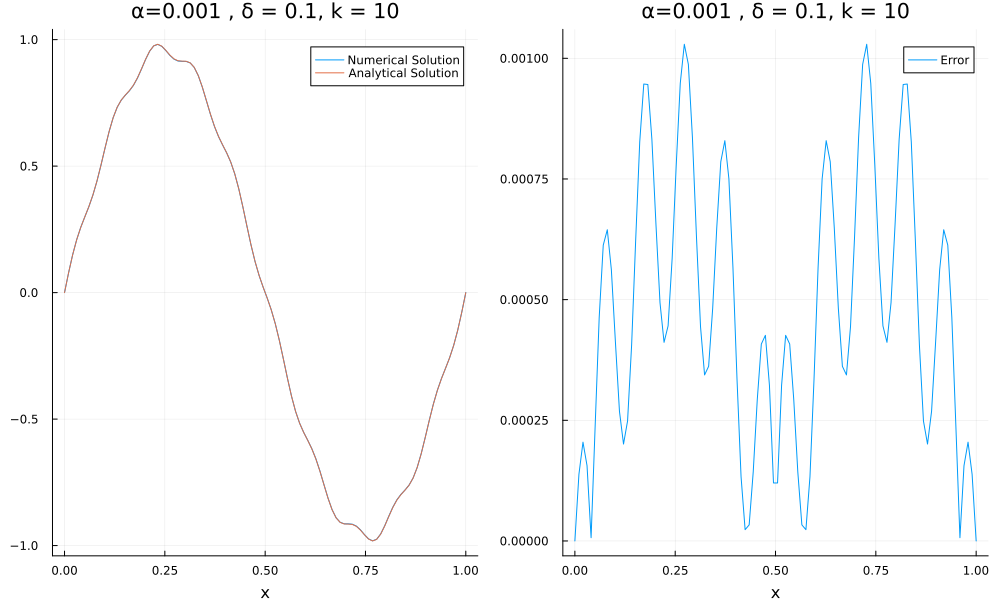

In [37]:
α = .001
γ = α / h^2
δ = .1

x = range(0,1,N)
A = Matrix_A(N,γ)
u = A \ fδ.(x,δ,k)

plot1 = plot(x,u , label = "Numerical Solution")
plot!(x,u_anl.(x,δ,k,α) , label = "Analytical Solution")

plot2 = plot(x, abs.(u - u_anl.(x,δ,k,α)) , label = "Error")

plot(plot1 , plot2 , size = (1000,600),title="α=$(α) , δ = $(δ), k = $(k)",xlabel="x")

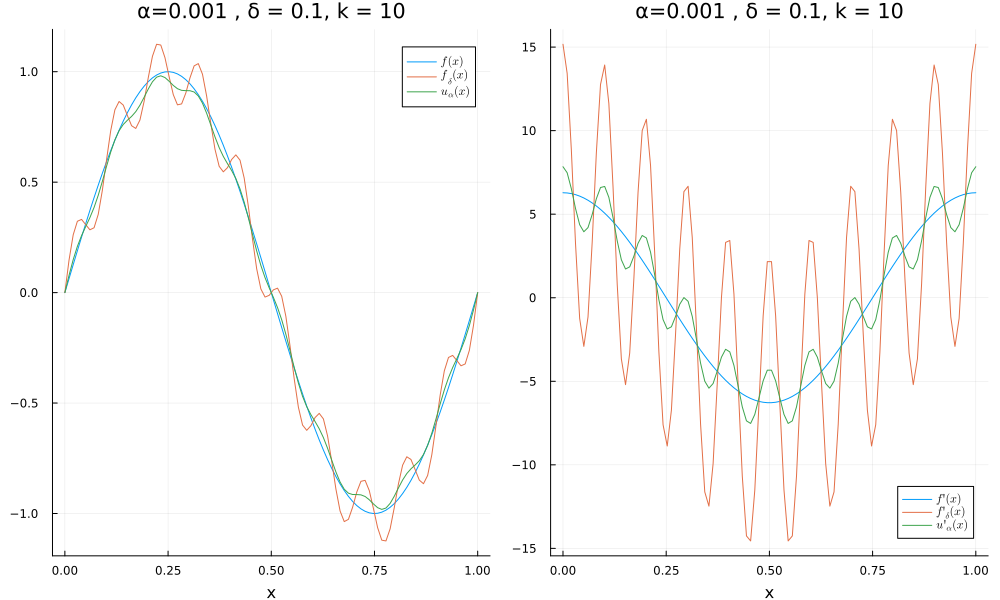

In [5]:

plot1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{δ}(x)")
plot!(x,u,label=L"u_{α}(x)")


plot2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label=L"f'_{δ}(x)")
plot!(x,dudx_anl.(x,δ,k,α),label=L"u'_{α}(x)")
xlabel!("x")

plot(plot1 , plot2 , size = (1000,600),title="α=$(α) , δ = $(δ), k = $(k)",xlabel="x")
xlabel!("x")

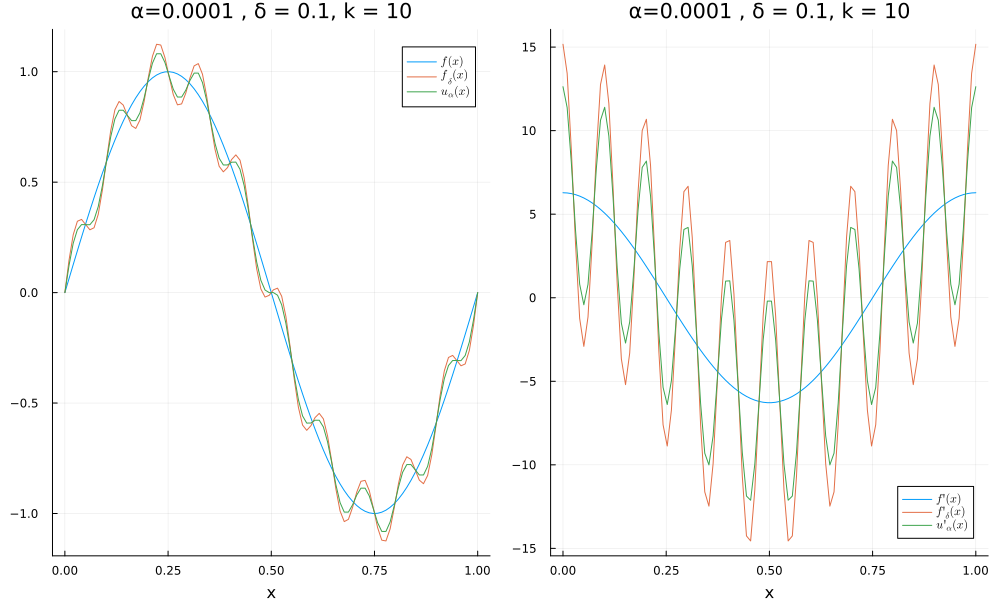

In [6]:
α = .0001
γ = α / h^2
δ = .1

x = range(0,1,N)
A = Matrix_A(N,γ)
u = A \ fδ.(x,δ,k)

plot1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{δ}(x)")
plot!(x,u,label=L"u_{α}(x)")


plot2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label=L"f'_{δ}(x)")
plot!(x,dudx_anl.(x,δ,k,α),label=L"u'_{α}(x)")
xlabel!("x")

plot(plot1 , plot2 , size = (1000,600),title="α=$(α) , δ = $(δ), k = $(k)",xlabel="x")
xlabel!("x")

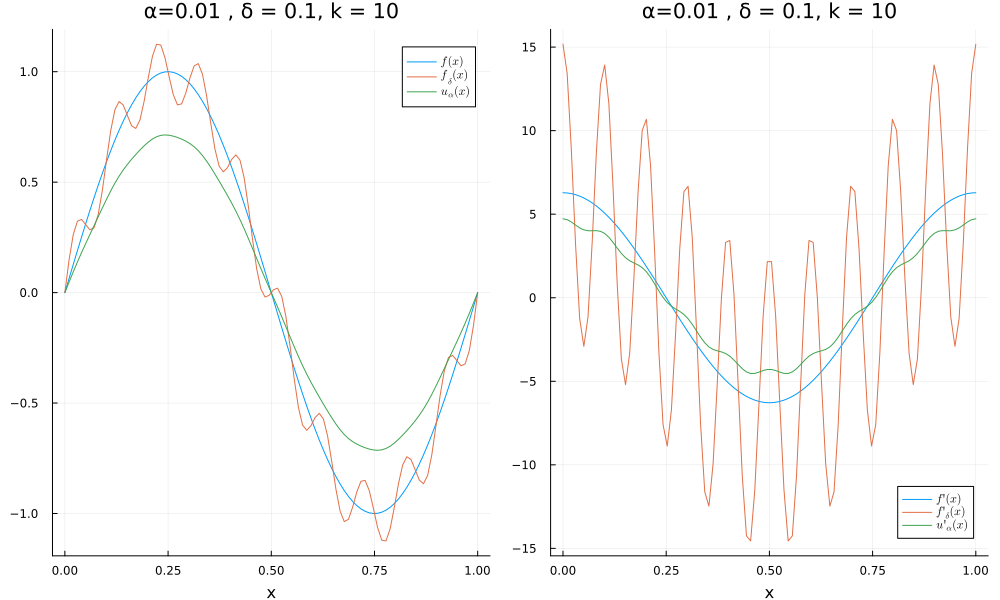

In [16]:
α = .01
γ = α / h^2
δ = .1

x = range(0,1,N)
A = Matrix_A(N,γ)
u = A \ fδ.(x,δ,k)

plot1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{δ}(x)")
plot!(x,u,label=L"u_{α}(x)")


plot2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label=L"f'_{δ}(x)")
plot!(x,dudx_anl.(x,δ,k,α),label=L"u'_{α}(x)")
xlabel!("x")

plot(plot1 , plot2 , size = (1000,600),title="α=$(α) , δ = $(δ), k = $(k)", xlabel="x")

## Error Estimation

The error estimation in the sup norm will be given by

$$ || u_{\alpha} - f ||_{L^{\infty}} = sup_{x \in [0,1]} | \frac{\sqrt{2}\delta sin(2\pi k x)}{4k^2 \alpha \pi^2 + 1} - \frac{sin(2\pi x)4\alpha \pi^2}{4\alpha \pi^2 + 1} | \leq | \frac{\sqrt{2}\delta}{4k^2 \alpha \pi^2 + 1} - \frac{4\alpha \pi^2}{4\alpha \pi^2 + 1} |$$


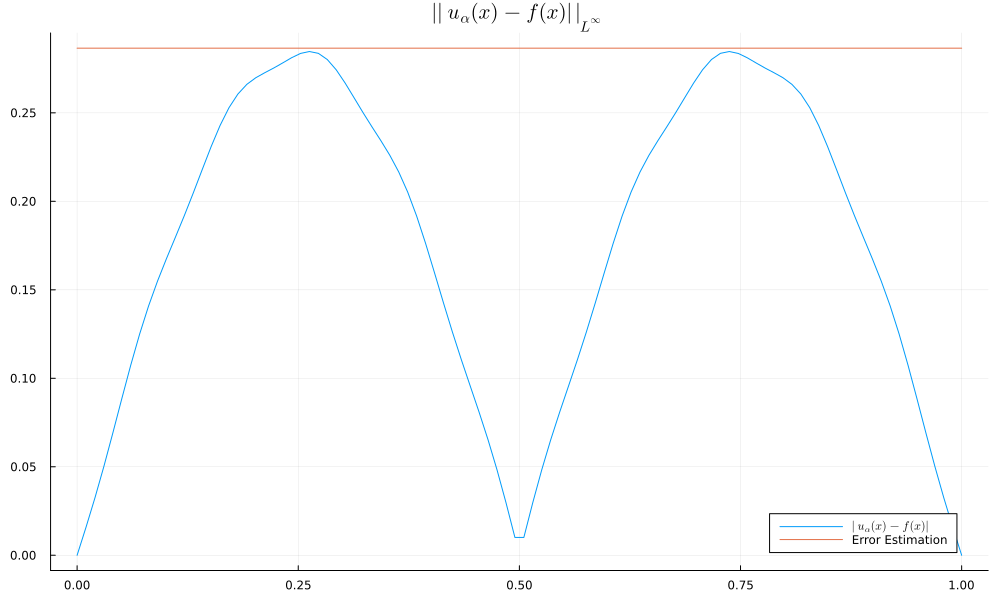

In [36]:
Err_sup = abs( (√2*δ) / (4*k^2*α*π^2 + 1) - ( 1 / (4*α*π^2 + 1) - 1 ) ) 
plot(x,abs.(f.(x) .- u_anl.(x,δ,k,α)),size=(1000,600) , label = L"|u_{α}(x) - f(x)|" , title = L"||u_{α}(x) - f(x)||_{L^{∞}}")
plot!(x,Err_sup * ones(length(x)) , label = "Error Estimation")

## Bound Estimation

We have

$$ f'(x) = 2\pi cos(2\pi x)$$

$$ u'(x) = \frac{2\pi cos(2\pi x)}{4\alpha \pi^2 + 1} + \frac{2\sqrt{2} \pi k \delta cos(2 \pi kx)}{4k^2 \alpha \pi^2 + 1}$$

$$ || u'(x) - f'(x)||^2_{L^{2}} = \int_0^1 |k_1 cos(2\pi x) - k_2 cos(2\pi kx)|^2 = \int_0^1 k_1^2 cos^2(2\pi x)dx - 2\int_0^1 k_1k_2 cos(2\pi x) cos(2\pi kx)dx + \int_0^1 k_2^2 cos^2(2\pi k x)dx $$ 

Where

$$ k_1 = \frac{2\pi}{4\alpha \pi^2 + 1} - 2\pi , \quad k_2 = \frac{2\sqrt{2} \pi k \delta}{4k^2 \alpha \pi^2 + 1}$$

We have that 

$$ \int_0^1 k_1^2 cos^2(2\pi x)dx = \frac{k^2_1}{2} , \quad \int_0^1 k_2^2 cos^2(2k\pi x)dx = \frac{k^2_2}{2}$$

Also, we have that

$$ -2k_1k_2 \int_0^1 cos(2\pi x) cos(2\pi kx)dx \geq -k_1k_2 [\int_0^1 cos^2(2\pi x) + cos^2(2\pi kx) dx] = -k_1k_2$$

We have therefore

$$ || u'(x) - f'(x)||^2_{L^{2}} \geq \frac{k^2_1 + k^2_2 - 2k_1 k_2}{2} = \frac{(k_1 - k_2)^2}{2}$$

We want now, to minimize the function $K(\alpha) = \frac{(k_1 - k_2)^2}{2}$

$$ K'(\alpha) = (k_1(\alpha) - k_2(\alpha))(k_1'(\alpha) - k_2'(\alpha))$$ 

Making calculations, we find

$$ \alpha_{min} = \frac{\sqrt{\pi^4(1-k\delta)^2 + 4k^3\delta \pi^4} - \pi^2(1-k\delta)}{9k^2 \pi^4}$$

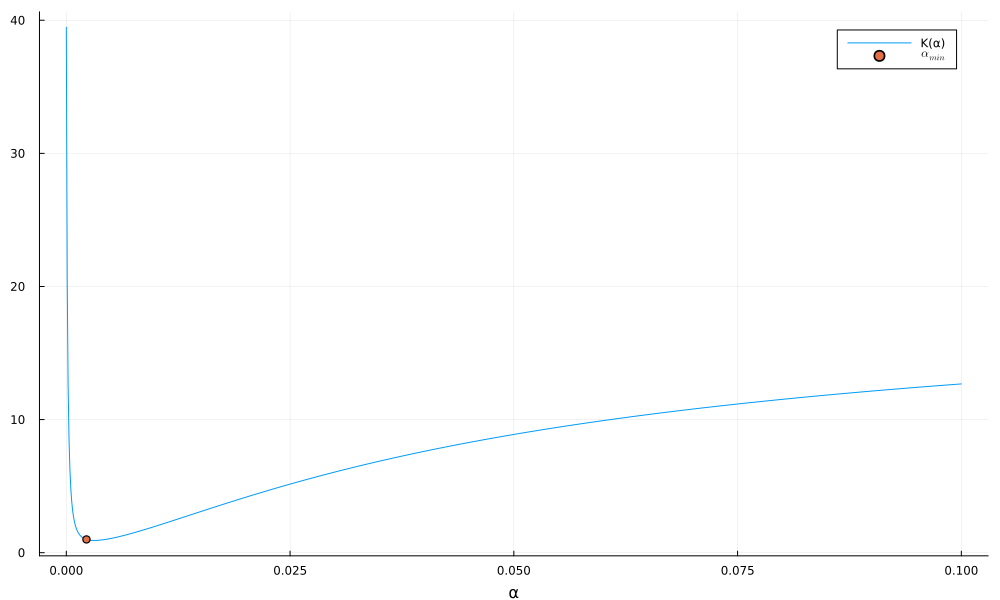

In [9]:
α = range(0,.1,1000)
function k1(α)
    return (2*π) / (4*α*π^2 + 1) - 2*π
end

function k2(α,k,δ)
    return (2*√2*π*k*δ) / (4*k^2*α*π^2 + 1)
end

function K(α,k,δ)
    return (k1(α) - k2(α,k,δ))^2 / 2
end

α_min = (sqrt(π^4*(1-k*δ)^2 + 4*k^3*δ*π^4) - π^2 * (1-k*δ))/ (9 * k^2 * π ^ 4)
plot(α , K.(α,k,δ) , label = "K(α)",size=(1000,600),xlabel="α")
scatter!([α_min] , [K(α_min , k , δ)],label=L"\alpha_{min}")

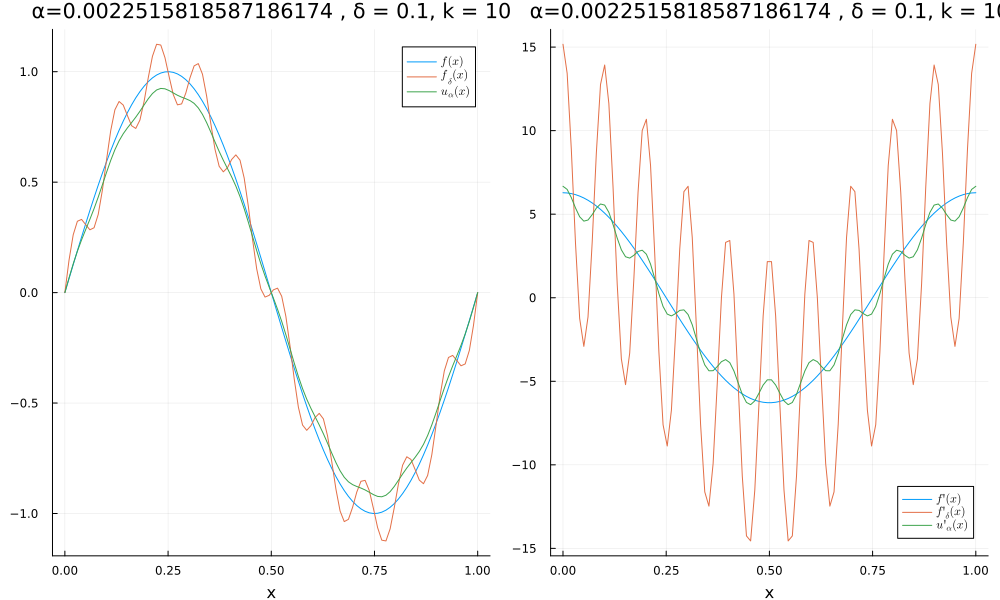

In [10]:
α = α_min
γ = α / h^2
δ = .1

x = range(0,1,N)
A = Matrix_A(N,γ)
u = A \ fδ.(x,δ,k)

plot1 = plot(x,f.(x),label=L"f(x)")
plot!(x,fδ.(x,δ,k),label=L"f_{δ}(x)")
plot!(x,u,label=L"u_{α}(x)")


plot2 = plot(x,dfdx.(x),label=L"f'(x)")
plot!(x,dfδdx.(x,δ,k),label=L"f'_{δ}(x)")
plot!(x,dudx_anl.(x,δ,k,α),label=L"u'_{α}(x)")
xlabel!("x")

plot(plot1 , plot2 , size = (1000,600),title="α=$(α) , δ = $(δ), k = $(k)",xlabel="x")

# Exercice II

We have the ODE

$$ -\frac{d}{d x}\left(a(x) \frac{d u}{d x}(x)\right)=f(x) , \quad x \in (0,1) $$

$$ a(0) \frac{du}{dx}(0) = 0, \quad a(1)\frac{du}{dx}(1) = 1$$

We can write $a(x)$ as

$$ a(x) = - \frac{1}{u'(x)}\int_0^x f(x)dx$$

### Case I

$$ f(x) = -1 , \quad u(x) = x $$

We have that

$$ a'(x) u'(x) + a(x)u''(x) = -f(x) $$

$$ a'(x) = 1 , \quad a(x) = x$$

We observe that the B.C are satisfied 

$$ a(0) \frac{du}{dx}(0) = 0, \quad a(1)\frac{du}{dx}(1) = 1 $$

As in the previous exercice, we note that the term $f(x)$ may be a first source of instability

### Case II

$$ f(x) = -1 , \quad u_{\delta}(x) = \delta sin(x/\delta^2) + x $$

$$ u'_{\delta}(x) = \frac{1}{\delta}cos(x/\delta^2) +1 , \quad u''(x) =  -\frac{1}{\delta^3}sin(x/\delta^2)$$

Then we have

$$ a_{\delta}(x) = \frac{x\delta}{cos(x/\delta^2) + \delta}$$

We notice that 

$$ a_{\delta} \rightarrow 0, \quad \delta \rightarrow 0$$

$$ u_{\delta} \rightarrow x , \quad \delta \rightarrow 0$$

We notice that the pertubation makes the problem unstable

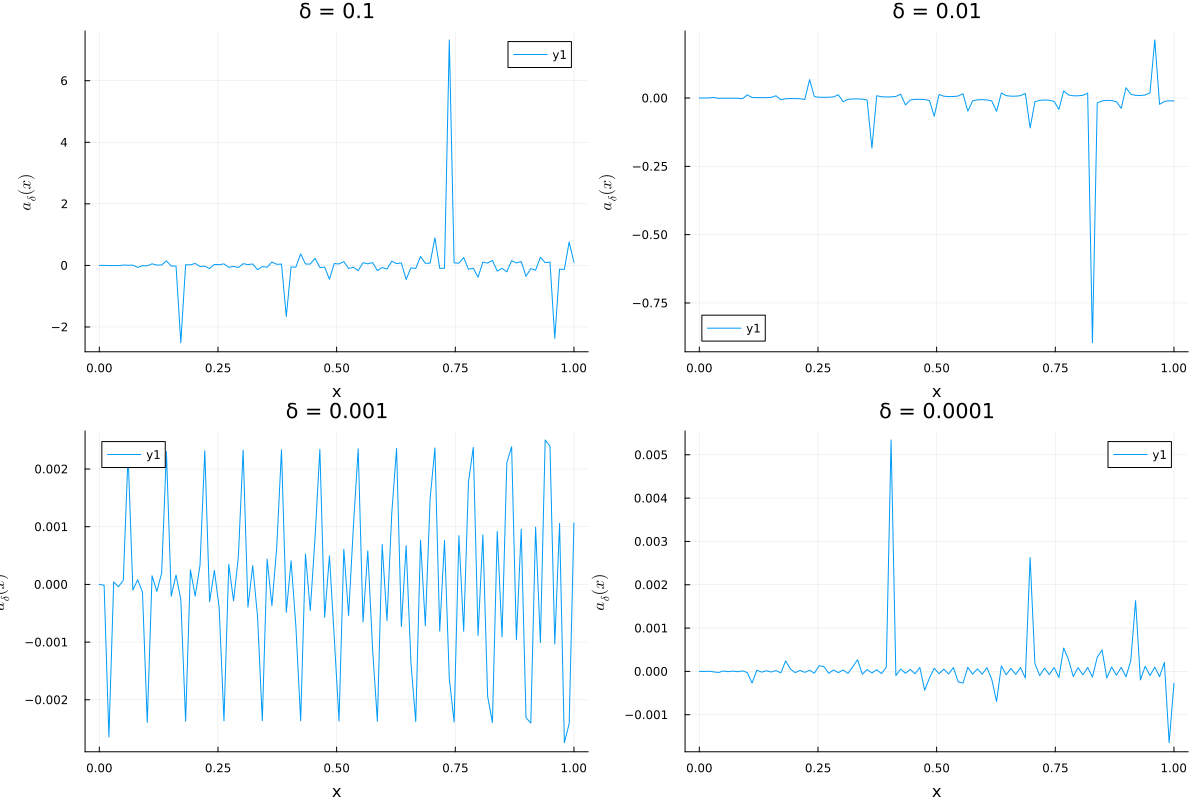

In [11]:
x = range(0,1,100)
δ1 = .1
δ2 = .01
δ3 = .001
δ4 = .0001

function aδ(x,δ)
    return x * δ / (cos(x/δ^2) + δ)
end

function uδ(x,δ)
    return δ*sin(x/δ^2) + x
end

plot1 = plot(x,aδ.(x,δ1) , title = "δ = $(δ1)")
plot2 = plot(x,aδ.(x,δ2) , title = "δ = $(δ2)")
plot3 = plot(x,aδ.(x,δ3) , title = "δ = $(δ3)")
plot4 = plot(x,aδ.(x,δ4) , title = "δ = $(δ4)")

plot(plot1 , plot2 , plot3 , plot4 , xlabel = "x" , ylabel = L"a_{δ}(x)" , size = (1200,800))

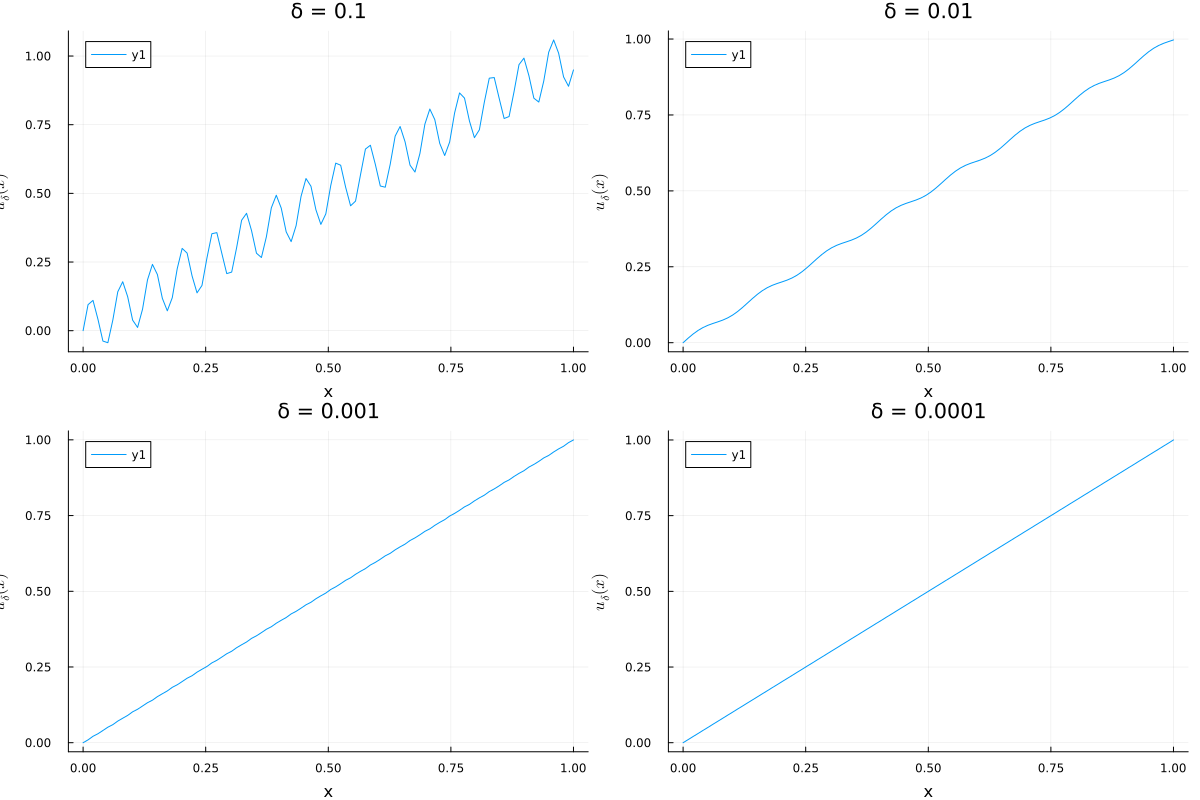

In [12]:
plot1 = plot(x,uδ.(x,δ1) , title = "δ = $(δ1)")
plot2 = plot(x,uδ.(x,δ2) , title = "δ = $(δ2)")
plot3 = plot(x,uδ.(x,δ3) , title = "δ = $(δ3)")
plot4 = plot(x,uδ.(x,δ4) , title = "δ = $(δ4)")

plot(plot1 , plot2 , plot3 , plot4 , xlabel = "x" , ylabel = L"u_{δ}(x)" , size = (1200,800))

### Case III

$$ f(x) = -1 $$

$$ -\frac{d}{d x}\left(a(x) \frac{d u_1}{d x}(x)\right)=f(x) , \quad x \in (0,1) $$

$$ -\frac{d}{d x}\left(a(x) \frac{d u_2}{d x}(x)\right)=f(x) , \quad x \in (0,1) $$

Then we have

$$ a_1(x) = \frac{x}{u_1'(x)} , \quad a_2(x) = \frac{x}{u_2'(x)}$$

$$ || a_1 - a_2 ||^2_{L^2} = \int_0^1 |\frac{x}{u_1'(x)} - \frac{x}{u_2'(x)}|^2 dx $$

From Minkovsky Inequality, we have

$$ ( \int_0^1 |\frac{x}{u_1'(x)} - \frac{x}{u_2'(x)}|^2 dx ) ^{-1/2} \geq || \frac{x}{u_1'(x)} ||_{L^2} - || \frac{x}{u_2'(x)} ||_{L^2}$$

Also, since $ 0 \leq x \leq 1$ we can write

$$ \int_0^1 |\frac{x}{u_1'(x)} - \frac{x}{u_2'(x)}|^2 dx <  \int_0^1 |\frac{1}{u_1'(x)} - \frac{1}{u_2'(x)}|^2 dx $$

Then

$$ ||\frac{x}{u_1'(x)} ||_{L^2} - || \frac{x}{u_2'(x)} ||_{L^2} \leq || a_1 - a_2 ||_{L^2} \leq || \frac{1}{u'_1(x)} - \frac{1}{u'_2(x)} ||_{L^{2}} $$

We see that the inverse of the derivate functions $u_1(x)$ and $u_2(x)$ need to belong to the Sobolev space